# Movies Database Project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

-  Year after year, day after day, The Film-Making Industry became more and more closer to the sky with an insane speed, so we decided to start working on this brief analysis to have a little bit deeper insight on such a huge industry. So we started working on a movie database that we got from IMDb which contains information about 10,000 movies from 1960 to 2015.

>

- **This dataset contains the following columns:**
> 
>- id : Movie id                     
>- imdb_id  : Movie Id on IMDb              
>- popularity : Movie popularity (The operational definition for this column and how it was calculated was not mentioned which make this a defect in this database)           
>- budget     : Movie budget             
>- revenue    : Movie revenues            
>- original_title         : Movie Title
>- cast               : Some cast members
>- homepage              : The homepage for the website of each movie
>- director               : Director(s) Name
>- tagline                : Movie Slogan
>- keywords               : searching Keywords(added by the users)
>- overview               : Brief overview of the movie
>- runtime                : Total runtime of a movie in minutes
>- genres                 : Movie different genres (added by users)
>- production_companies   : Name of production companies that produced this movie
>- release_date           : Movie release date
>- vote_count             : Number of votes
>- vote_average          : Average voting score
>- release_year          : Movie release year
>- budget_adj            : Movie budget in terms of 2010 inflammation
>- revenue_adj     : Movie revenues in terms of 2010 inflammation

> 

- **In this dataset we defined 3 main dependent variables which are:** 

>- 1- **The financial state of the movie** either with gaining profits or with loss. 
>> In order to deal with the financial state of movies I made 2 new data frames for movies with profits and the other for those who have lost money represented in a new column in each named profit and loss respectively.
>> I also used budjet_adj and revenue_adj column to calculate them in terms of 2010 inflammation to provide some consistency in the analysis process.

>- 2- **The popularity of each movie** using he average voting score for each movie.
>> The results in this section may encounter some bias problems for movies with low voting count, so I decided to include only movies with vote count more than 30
>> I depended on this score to guide my analysis for popularity, so for some analytical processes I decided to be more firm and accept vote average scores with vote count more than 100 to get more representative results and reduce bias as it is more common for popular movies to be more popular among people, and hence have more voting count.

>- 3- **Popularity score**
>> As I mentioned before, The operational definition for this column and how it was calculated was not mentioned which make this a defect in this database, so I decided not to depend on this column to guide my results, but only used it for the sake of clarification as it will be more clearer during the analysis process.

>

- **In this dataset we defined 4 main independent variables which are:**

>- 1- **The production companies of each movie**
>>- When dealing with this column it should be clear that we did not have information about the net profit of each company, so we used the profits of movies that this company was a part of to gain some insights.
>>- We also did not have information about the mother company for each company and did not aggregate them together, we only dealt with each company alone.
>>- Some of the movies are produced with more than one company not only one, so we should be careful before making any judgments.

>- 2- **The director of the movie**
>>- We should be aware here that some movies have more then one director
>>- In order to get more precise results I compared only the top 100 directors that participated in movies

>- 3- **Movie Genres**
>>- This section was entered by Users, so the results may not be very precise
>>- Also in most cases all the movies fall into more than one category, so we will discuss this parts as genres involved in movies that got the highest popularity scores, and the biggest profits.

>- 4- **Movie cast** 
>>- In this column we have the names of 4 main actors for each movie 
>>- The order of mentioning them was according to the sequence of appearing in the movie not the size of their roles
>>- In This section also In order to get more precise results I compared only the top 100 actors that participated in movies

> 


> **In terms of the previously mentioned variables, we started our journey to have some insights and answer some question that we have as :**

>>-  `1-What are the top 5 movies That gained most profits, and How popular they were?` 


>>- `2-What are the top 5 movies associated with biggest loss in money, and How popular they were?`

>>- `3-What are the top 5 popular movies, and How their profits were ?` 

>>- `4-Who are the top 5 directors associated with movies That were most popular?`

>>- `5-What are the top 5 production companies that their movies gained the biggest overall profits?`

>>- `6-What are the top 10 Genres associated with movies That gained most profits?`

>>- `7-What are the top 10 Genres associated with movies That were most popular?`

>>- `8-Who are The top 5 Actors associated with movies That gained most profits, and How popular they were?`

>>- `9-Who are The top 5 Actors associated with movies That was most popular, and How their profits were?`


In [1]:
# Importing All the necessary libraries For this Analysis
# And setting things up for best practice
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='dark',font_scale=1.5)
pd.set_option('display.float_format', lambda x: '%.2f' %x)

<a id='wrangling'></a>
## Data Wrangling




### Exploring General Properties Of this dataset

In [2]:
# Loading Data into a DataFrame
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [3]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.08,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.40,1966,0.00,0.00
10862,20379,tt0060472,0.07,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.70,1966,0.00,0.00
10863,39768,tt0060161,0.07,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.50,1966,0.00,0.00
10864,21449,tt0061177,0.06,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.40,1966,0.00,0.00
10865,22293,tt0060666,0.04,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.50,1966,127642.28,0.00


In [4]:
df.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3524,63207,tt1634121,0.76,13000000,0,Intruders,Clive Owen|Carice van Houten|Ella Purnell|Ella...,NaN,Juan Carlos Fresnadillo,The Nightmare is Real.,...,"Though no one can see him, Hollow Face lurks i...",100,Horror|Thriller|Drama,Universal Pictures International (UPI)|Antena ...,9/12/11,83,5.20,2011,12602174.55,0.00
3720,72477,tt1389127,0.28,0,957240,Texas Killing Fields,Sam Worthington|Jessica Chastain|ChloÃ« Grace ...,NaN,Ami Canaan Mann,No one is safe.,...,"In the Texas bayous, a local homicide detectiv...",105,Drama|Thriller|Crime|Mystery,Forward Pass|Anchor Bay Films|Block / Hanson|W...,10/14/11,60,5.90,2011,0.00,927946.58
9118,3033,tt0120684,0.19,10000000,6451628,Gods and Monsters,Ian McKellen|Brendan Fraser|Lynn Redgrave|Loli...,http://www.godsandmonsters.net/,Bill Condon,NaN,...,"It's 1957, and Whale's heyday as the director ...",105,Drama,Lions Gate Films|Flashpoint (I)|Showtime Networks,1/21/98,23,5.60,1998,13376954.69,8630313.54
6306,9291,tt0398165,0.64,82000000,190320568,The Longest Yard,Adam Sandler|Chris Rock|Burt Reynolds|Michael ...,NaN,Peter Segal,"If you can't get out, get even.",...,"Pro quarter-back, Paul Crewe and former colleg...",113,Comedy|Drama,Paramount Pictures|Columbia Pictures Corporati...,5/19/05,443,6.20,2005,91558189.75,212504959.49
603,357974,tt3132422,0.04,0,0,Student Bodies,Whitney Moore|Tom Arnold|Simon Rex|Lucius Bast...,NaN,Andrew Drazek,NaN,...,After experiencing a series of sexually relate...,92,Comedy,Tiberius Film,9/3/15,14,6.00,2015,0.00,0.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> dropping columns that would not be used during the analysis.

In [6]:
df.drop(['id', 'imdb_id','homepage','tagline','keywords','overview','runtime', 'release_date'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,137999939.28,1392445892.52
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,137999939.28,348161292.49
2,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.30,2015,101199955.47,271619025.41
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.50,2015,183999919.04,1902723129.80
4,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.30,2015,174799923.09,1385748801.47


> Dropping duplicated values

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

> As we here talk about budget and revenues in millions, if not hundreds of millions, so we will change the type of these columns to int instead of float

In [9]:
df[['budget_adj','revenue_adj']] = df[['budget_adj','revenue_adj']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   genres                10842 non-null  object 
 7   production_companies  9835 non-null   object 
 8   vote_count            10865 non-null  int64  
 9   vote_average          10865 non-null  float64
 10  release_year          10865 non-null  int64  
 11  budget_adj            10865 non-null  int32  
 12  revenue_adj           10865 non-null  int32  
dtypes: float64(2), int32(2), int64(4), object(5)
memory usage: 1.1+ MB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   genres                10842 non-null  object 
 7   production_companies  9835 non-null   object 
 8   vote_count            10865 non-null  int64  
 9   vote_average          10865 non-null  float64
 10  release_year          10865 non-null  int64  
 11  budget_adj            10865 non-null  int32  
 12  revenue_adj           10865 non-null  int32  
dtypes: float64(2), int32(2), int64(4), object(5)
memory usage: 1.1+ MB


> Changing columns to int 32 for consistency and memory usage

In [11]:
df[['budget','revenue','vote_count', 'release_year']] = df[['budget', 'revenue', 'vote_count', 'release_year']].astype(int)                                                                        
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int32  
 2   revenue               10865 non-null  int32  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   genres                10842 non-null  object 
 7   production_companies  9835 non-null   object 
 8   vote_count            10865 non-null  int32  
 9   vote_average          10865 non-null  float64
 10  release_year          10865 non-null  int32  
 11  budget_adj            10865 non-null  int32  
 12  revenue_adj           10865 non-null  int32  
dtypes: float64(2), int32(6), object(5)
memory usage: 933.7+ KB


In [12]:
df.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00
mean,0.65,14624286.06,39431593.06,217.40,5.98,2001.32,17549893.81,49631265.58
std,1.00,30914284.61,114982446.83,575.64,0.94,12.81,34307526.53,142587065.25
min,0.00,0.00,-1513461449.00,10.00,1.50,1960.00,0.00,-2147483648.00
25%,0.21,0.00,0.00,17.00,5.40,1995.00,0.00,0.00
50%,0.38,0.00,0.00,38.00,6.00,2006.00,0.00,0.00
75%,0.71,15000000.00,24000000.00,146.00,6.60,2011.00,20853251.00,33672117.00
max,32.99,425000000.00,2068178225.00,9767.00,9.20,2015.00,425000000.00,1907005841.00


> Making a data frame to help answer popularity questions

In [13]:
df_pop = df.copy()  # To answer popularity Questions

# Deleting unneccesary columns to answer popularity questions
cols = ['budget', 'revenue', 'budget_adj', 'revenue_adj']
df_pop.drop(cols, axis=1, inplace=True)

# Droping NaNs
df_pop.dropna(inplace=True)
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   original_title        9772 non-null   object 
 2   cast                  9772 non-null   object 
 3   director              9772 non-null   object 
 4   genres                9772 non-null   object 
 5   production_companies  9772 non-null   object 
 6   vote_count            9772 non-null   int32  
 7   vote_average          9772 non-null   float64
 8   release_year          9772 non-null   int32  
dtypes: float64(2), int32(2), object(5)
memory usage: 687.1+ KB


> Deleting Columns with value count < 30 to reduce bias as mentioned before

In [14]:
# Getting indices of columns with vote count less than 30
row_del = df_pop.query('vote_count < 30').index 

# Dropping them
df_pop.drop(row_del, axis=0,inplace=True)

# Testing for them
df_pop.query('vote_count < 30')

,popularity,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year


In [15]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5949 entries, 0 to 10848
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            5949 non-null   float64
 1   original_title        5949 non-null   object 
 2   cast                  5949 non-null   object 
 3   director              5949 non-null   object 
 4   genres                5949 non-null   object 
 5   production_companies  5949 non-null   object 
 6   vote_count            5949 non-null   int32  
 7   vote_average          5949 non-null   float64
 8   release_year          5949 non-null   int32  
dtypes: float64(2), int32(2), object(5)
memory usage: 418.3+ KB


> Making a data frame to help answer money related questions

In [16]:
df_money = df.copy()  # To answer profits and loss Questions
df_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int32  
 2   revenue               10865 non-null  int32  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   genres                10842 non-null  object 
 7   production_companies  9835 non-null   object 
 8   vote_count            10865 non-null  int32  
 9   vote_average          10865 non-null  float64
 10  release_year          10865 non-null  int32  
 11  budget_adj            10865 non-null  int32  
 12  revenue_adj           10865 non-null  int32  
dtypes: float64(2), int32(6), object(5)
memory usage: 933.7+ KB


In [17]:
# Dropping indices of columns with vote count less than 30
df_money.drop(row_del, axis=0,inplace=True) # row_del are indices of these columns

# Testing for them
row_del.isin(df_money).sum()

0

In [18]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 10853
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            7042 non-null   float64
 1   budget                7042 non-null   int32  
 2   revenue               7042 non-null   int32  
 3   original_title        7042 non-null   object 
 4   cast                  6966 non-null   object 
 5   director              6998 non-null   object 
 6   genres                7019 non-null   object 
 7   production_companies  6012 non-null   object 
 8   vote_count            7042 non-null   int32  
 9   vote_average          7042 non-null   float64
 10  release_year          7042 non-null   int32  
 11  budget_adj            7042 non-null   int32  
 12  revenue_adj           7042 non-null   int32  
dtypes: float64(2), int32(6), object(5)
memory usage: 605.2+ KB


>  Dropping budgets and revenues with zero values as they are missing values

In [19]:
# Getting the number of these values
df_money.query('budget == 0 | revenue == 0 | budget_adj == 0 | revenue_adj == 0').value_counts().sum()

2526

In [20]:
cols = ['budget', 'revenue', 'budget_adj', 'revenue_adj']
#Replacing zeros with NaNs
df_money[cols].replace(0, np.nan, inplace=True)

# dropping Nans
df_money.dropna(inplace=True)

# testing values
df_money.query('budget == 0 | revenue == 0 | budget_adj == 0 | revenue_adj == 0').value_counts().sum()

2526

In [21]:
# Changing these columns type to int
df_money[cols] = df_money[cols].astype(int)
df_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5949 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            5949 non-null   float64
 1   budget                5949 non-null   int32  
 2   revenue               5949 non-null   int32  
 3   original_title        5949 non-null   object 
 4   cast                  5949 non-null   object 
 5   director              5949 non-null   object 
 6   genres                5949 non-null   object 
 7   production_companies  5949 non-null   object 
 8   vote_count            5949 non-null   int32  
 9   vote_average          5949 non-null   float64
 10  release_year          5949 non-null   int32  
 11  budget_adj            5949 non-null   int32  
 12  revenue_adj           5949 non-null   int32  
dtypes: float64(2), int32(6), object(5)
memory usage: 511.2+ KB


###  While doing the analysis process below it turns out that there is a quality issue in the Brother Bear movie as its revenue and revenue_adj was not correct.

>- The Brother Bear movie has a total revenues of  __250,397,798__ dollar not  __250__ dollar only !! 
According to: [the-numbers.com](https://www.the-numbers.com/movie/Brother-Bear#tab=summary) 
Which make this a quality error in the data that needs to be fixed.
>- So revenue_adj will also be edited to be  __275,386,308__ according to: [inflation-calculator](https://www.calculator.net/inflation-calculator.html?cstartingamount1=250397798&cinyear1=2009&coutyear1=2015&calctype=1&x=66&y=7)  

In [22]:
# Getting the movie indicis
ind = df_money[df_money['original_title'] == 'Brother Bear'].index[0]

# Correcting the value of revenues
df_money.at[ind, 'revenue'] = 250397798
df_money.at[ind, 'revenue_adj'] = 275386308

# Testing the results
df_money[df_money['original_title'] == 'Brother Bear'][['revenue', 'revenue_adj']]

,revenue,revenue_adj
4970,250397798,275386308


### As mentioned above we will depend on this columns revenue_adj and budget for adj for calculating the profit and loss of different movie  

> Getting the absolute value before applying calculations

In [23]:
cols = ['budget', 'revenue', 'budget_adj', 'revenue_adj']

# Getting the absolute value
for c in cols:
    df_money[c] = df_money[c].apply(abs)

# Testing the results
df_money.query('budget < 0 | revenue < 0 | budget_adj < 0 | revenue_adj < 0')

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj


> Making a new column named change to represent profits and loss of movies
>> Making the column by subtracting movies' revenues from budgets in terms of 2010 inflammation

In [24]:
df_money['change'] = df_money['revenue_adj'] - df_money['budget_adj']

# Testing results
df_money.info()
df_money.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5949 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            5949 non-null   float64
 1   budget                5949 non-null   int64  
 2   revenue               5949 non-null   int64  
 3   original_title        5949 non-null   object 
 4   cast                  5949 non-null   object 
 5   director              5949 non-null   object 
 6   genres                5949 non-null   object 
 7   production_companies  5949 non-null   object 
 8   vote_count            5949 non-null   int32  
 9   vote_average          5949 non-null   float64
 10  release_year          5949 non-null   int32  
 11  budget_adj            5949 non-null   int64  
 12  revenue_adj           5949 non-null   int64  
 13  change                5949 non-null   int64  
dtypes: float64(2), int32(2), int64(5), object(5)
memory usage: 810.7+ KB


,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,change
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,137999939,1392445892,1254445953
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,137999939,348161292,210161353
2,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.30,2015,101199955,271619025,170419070
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.50,2015,183999919,1902723129,1718723210
4,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.30,2015,174799923,1385748801,1210948878


>  Making 2 dataframes from df_money one for movies with profits and the other for movies with loss.

In [25]:
# Getting only movies with positive results in the change column 
# Which means that their revenues are bigger than their budgets
df_prof = df_money.query('change > 0')

# Testing the results
df_prof.query('change < 0')

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,change


In [26]:
# Getting only movies with negative results in the change column 
# Which means that their revenues are less than their budgets
df_loss = df_money.query('change < 0')

# Testing the results
df_loss.query('change > 0')

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,change


In [27]:
# Exploring the dataframe
df_prof.info()
df_prof.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3213 non-null   float64
 1   budget                3213 non-null   int64  
 2   revenue               3213 non-null   int64  
 3   original_title        3213 non-null   object 
 4   cast                  3213 non-null   object 
 5   director              3213 non-null   object 
 6   genres                3213 non-null   object 
 7   production_companies  3213 non-null   object 
 8   vote_count            3213 non-null   int32  
 9   vote_average          3213 non-null   float64
 10  release_year          3213 non-null   int32  
 11  budget_adj            3213 non-null   int64  
 12  revenue_adj           3213 non-null   int64  
 13  change                3213 non-null   int64  
dtypes: float64(2), int32(2), int64(5), object(5)
memory usage: 351.4+ KB


,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,change
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,137999939,1392445892,1254445953
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,137999939,348161292,210161353
2,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.30,2015,101199955,271619025,170419070
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.50,2015,183999919,1902723129,1718723210
4,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.30,2015,174799923,1385748801,1210948878


In [28]:
# Exploring the dataframe
df_loss.info()
df_loss.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 48 to 10827
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            1416 non-null   float64
 1   budget                1416 non-null   int64  
 2   revenue               1416 non-null   int64  
 3   original_title        1416 non-null   object 
 4   cast                  1416 non-null   object 
 5   director              1416 non-null   object 
 6   genres                1416 non-null   object 
 7   production_companies  1416 non-null   object 
 8   vote_count            1416 non-null   int32  
 9   vote_average          1416 non-null   float64
 10  release_year          1416 non-null   int32  
 11  budget_adj            1416 non-null   int64  
 12  revenue_adj           1416 non-null   int64  
 13  change                1416 non-null   int64  
dtypes: float64(2), int32(2), int64(5), object(5)
memory usage: 154.9+ KB


,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,change
48,2.93,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,481,5.30,2015,27599987,0,-27599987
57,2.58,60000000,30418560,Mortdecai,Johnny Depp|Gwyneth Paltrow|Ewan McGregor|Paul...,David Koepp,Comedy|Adventure,Lionsgate|Mad Chance|OddLot Entertainment|Huay...,696,5.30,2015,55199975,27985062,-27214913
59,2.55,70000000,17752940,Blackhat,Chris Hemsworth|Leehom Wang|Tang Wei|Viola Dav...,Michael Mann,Mystery|Crime|Action|Thriller|Drama,Universal Pictures|Forward Pass|Legendary Pict...,584,5.00,2015,64399971,16332697,-48067274
66,2.35,100000000,93820758,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,Thriller|Drama|Adventure|Action|History,Imagine Entertainment|Spring Creek Productions...,805,6.40,2015,91999959,86315059,-5684900
67,2.33,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,280,5.40,2015,18399991,0,-18399991


> Changing the change column in the two dataframes to a more representitive names 

In [29]:
# changing it to profit in the profits dataframe
df_prof.rename(columns={'change': 'profit'}, inplace=True)

# changing it to loss in the loss dataframe
df_loss.rename(columns={'change': 'loss'}, inplace=True)

In [30]:
# Exploring the dataframe
df_prof.info()
df_prof.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3213 non-null   float64
 1   budget                3213 non-null   int64  
 2   revenue               3213 non-null   int64  
 3   original_title        3213 non-null   object 
 4   cast                  3213 non-null   object 
 5   director              3213 non-null   object 
 6   genres                3213 non-null   object 
 7   production_companies  3213 non-null   object 
 8   vote_count            3213 non-null   int32  
 9   vote_average          3213 non-null   float64
 10  release_year          3213 non-null   int32  
 11  budget_adj            3213 non-null   int64  
 12  revenue_adj           3213 non-null   int64  
 13  profit                3213 non-null   int64  
dtypes: float64(2), int32(2), int64(5), object(5)
memory usage: 351.4+ KB


,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,137999939,1392445892,1254445953
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,137999939,348161292,210161353
2,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.30,2015,101199955,271619025,170419070
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.50,2015,183999919,1902723129,1718723210
4,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.30,2015,174799923,1385748801,1210948878


In [31]:
# Exploring the dataframe
df_loss.info()
df_loss.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 48 to 10827
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            1416 non-null   float64
 1   budget                1416 non-null   int64  
 2   revenue               1416 non-null   int64  
 3   original_title        1416 non-null   object 
 4   cast                  1416 non-null   object 
 5   director              1416 non-null   object 
 6   genres                1416 non-null   object 
 7   production_companies  1416 non-null   object 
 8   vote_count            1416 non-null   int32  
 9   vote_average          1416 non-null   float64
 10  release_year          1416 non-null   int32  
 11  budget_adj            1416 non-null   int64  
 12  revenue_adj           1416 non-null   int64  
 13  loss                  1416 non-null   int64  
dtypes: float64(2), int32(2), int64(5), object(5)
memory usage: 154.9+ KB


,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,loss
48,2.93,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,481,5.30,2015,27599987,0,-27599987
57,2.58,60000000,30418560,Mortdecai,Johnny Depp|Gwyneth Paltrow|Ewan McGregor|Paul...,David Koepp,Comedy|Adventure,Lionsgate|Mad Chance|OddLot Entertainment|Huay...,696,5.30,2015,55199975,27985062,-27214913
59,2.55,70000000,17752940,Blackhat,Chris Hemsworth|Leehom Wang|Tang Wei|Viola Dav...,Michael Mann,Mystery|Crime|Action|Thriller|Drama,Universal Pictures|Forward Pass|Legendary Pict...,584,5.00,2015,64399971,16332697,-48067274
66,2.35,100000000,93820758,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,Thriller|Drama|Adventure|Action|History,Imagine Entertainment|Spring Creek Productions...,805,6.40,2015,91999959,86315059,-5684900
67,2.33,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,280,5.40,2015,18399991,0,-18399991


> Changing the values in the loss column to positive values after they were defined as loss

In [32]:
# Changing the values by multiplying by negative one
df_loss['loss'] *= -1

# Testing results
df_loss.query('loss < 0')

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,loss


<a id='eda'></a>
## Exploratory Data Analysis


In [33]:
# Exploring the dataframe
df_pop.describe()

,popularity,vote_count,vote_average,release_year
count,5949.00,5949.00,5949.00,5949.00
mean,0.98,382.17,6.15,2002.19
std,1.24,738.34,0.81,11.78
min,0.00,30.00,2.50,1960.00
25%,0.40,55.00,5.60,1996.00
50%,0.64,123.00,6.20,2006.00
75%,1.10,348.00,6.70,2011.00
max,32.99,9767.00,8.50,2015.00


In [34]:
# Exploring the dataframe
df_loss.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj,loss
count,1416.00,1416.00,1416.00,1416.00,1416.00,1416.00,1416.00,1416.00,1416.00
mean,0.66,26401388.15,10559992.40,147.01,5.88,2003.09,31743043.51,12479730.58,19263312.93
std,0.44,29094611.74,18894557.92,178.47,0.81,10.54,33282242.46,21736857.84,23892617.38
min,0.02,1.00,0.00,30.00,2.90,1960.00,1.00,0.00,1.00
25%,0.38,7000000.00,0.00,49.00,5.30,1998.00,8131203.00,0.00,4640355.75
50%,0.55,18000000.00,723591.50,84.00,5.90,2006.00,21033371.00,791735.00,11284454.50
75%,0.81,35000000.00,14438439.75,172.00,6.50,2011.00,44320224.00,17164259.75,25343831.00
max,3.99,425000000.00,173000000.00,1777.00,8.00,2015.00,425000000.00,181938664.00,413912431.00


In [35]:
# Exploring the dataframe
df_prof.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,3213.00,3213.00,3213.00,3213.00,3213.00,3213.00,3213.00,3213.00,3213.00
mean,1.32,34469539.07,127187038.84,609.09,6.29,2001.14,40508938.48,162858164.39,122349225.91
std,1.57,44809978.38,183115021.52,937.96,0.75,11.89,47610895.63,223210268.84,196468145.93
min,0.01,0.00,3.00,30.00,3.40,1960.00,0.00,14.00,11.00
25%,0.54,3000000.00,24078196.00,101.00,5.80,1994.00,4605455.00,33675645.00,16012858.00
50%,0.91,19000000.00,64437847.00,261.00,6.30,2005.00,24878390.00,86242400.00,53954538.00
75%,1.53,48000000.00,153997819.00,681.00,6.80,2011.00,57934401.00,198313200.00,138853202.00
max,32.99,380000000.00,2068178225.00,9767.00,8.40,2015.00,368371256.00,2147483648.00,2108194372.00


### Exploring with a scatter matrix

>- This tell us some useful information about especilly about

>>- **The Release Year and The budgets of movies** which seems to have a positive correlation

>>- **Vote count and the average voting scores** which seems to be approximately normally distributed with the majority of values have higher voting count and higher voting average

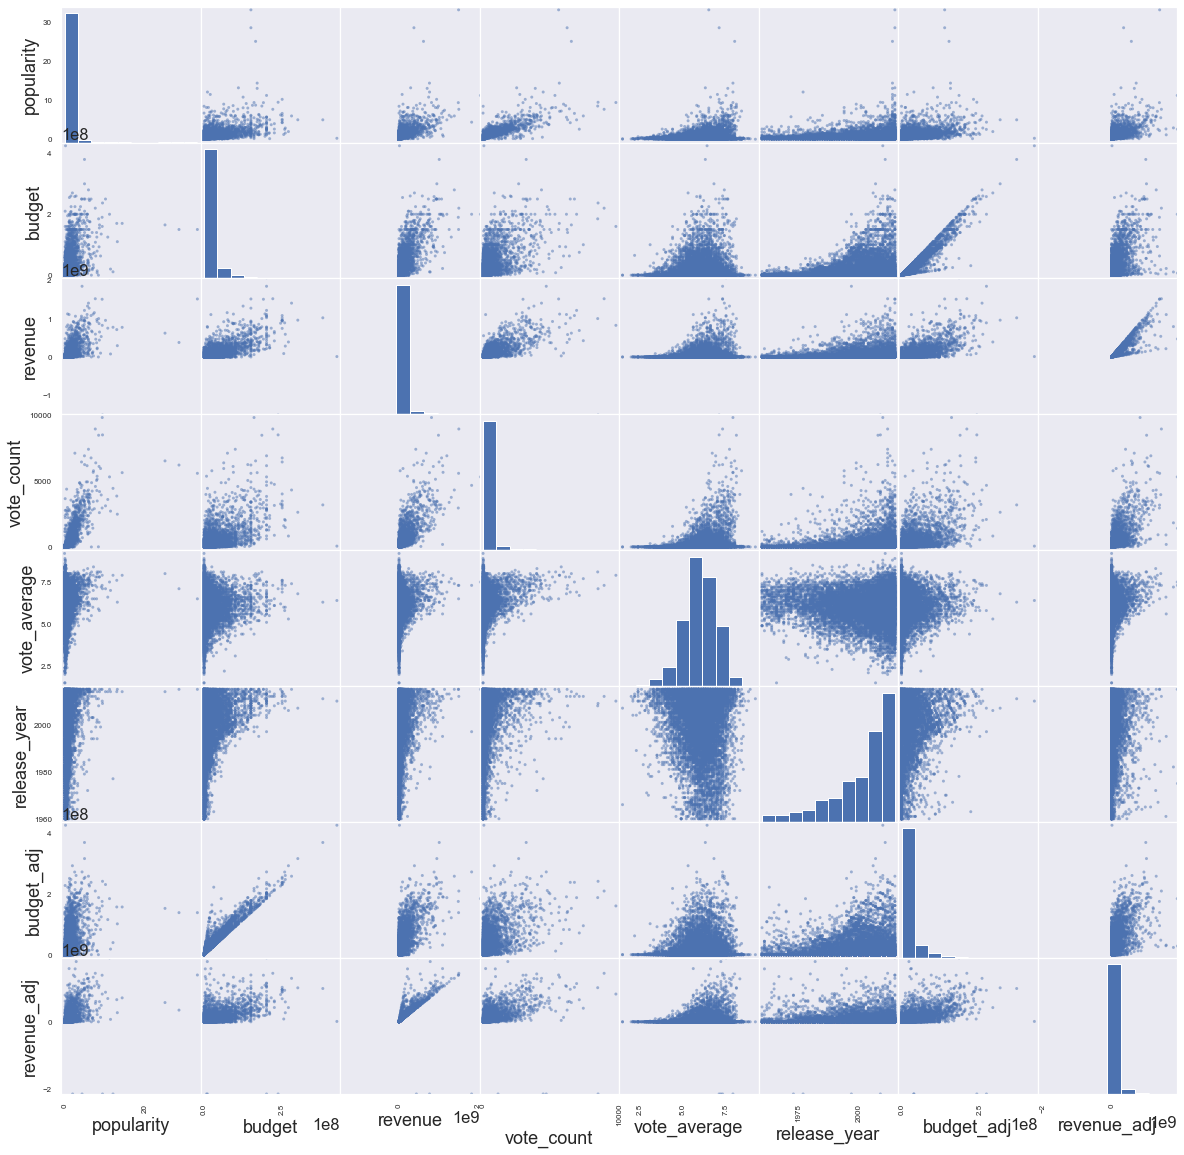

In [36]:
# Showing a scatter matrix between different variables
pd.plotting.scatter_matrix(df,figsize=(20,20));

### Exploring with histograms

> These charts shows some useful information, but the one to focus on is the number of movies released per year which seems to be highly increasing over time

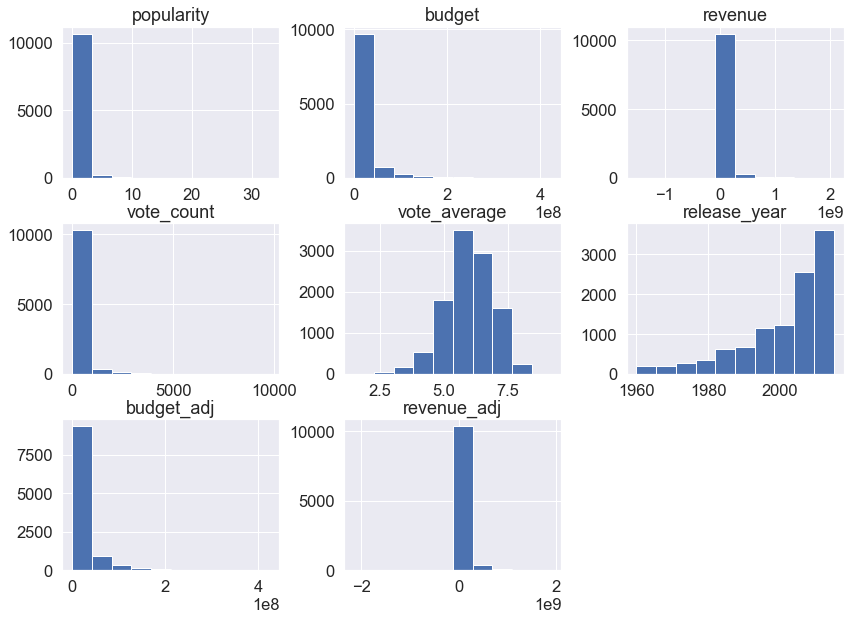

In [37]:
# Exploring general chracteristics in the main data frame 
df.hist(figsize=(14,10));

> This Histogram Shows how the number of movies produced each year is highly increased year after year 

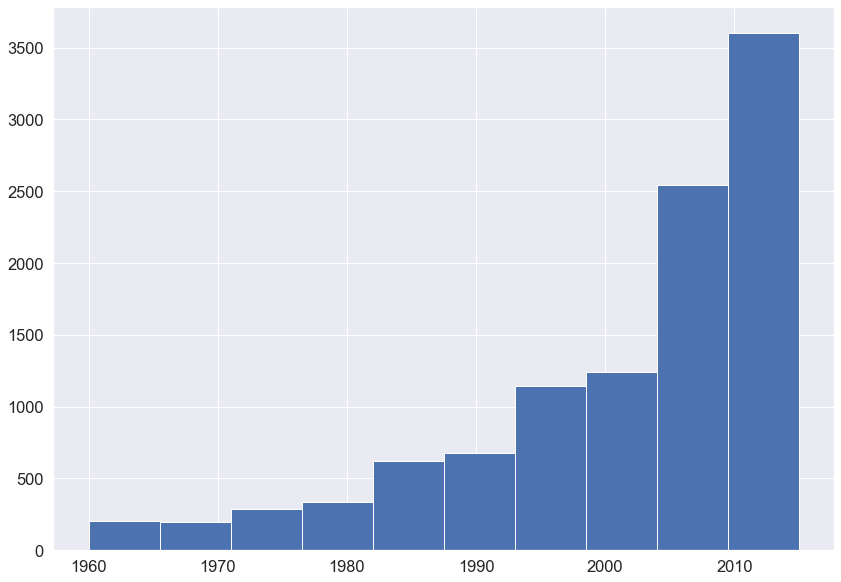

In [38]:
# Comparison between the release year of movies and the number of movies produced every year
df.release_year.hist(figsize=(14,10));

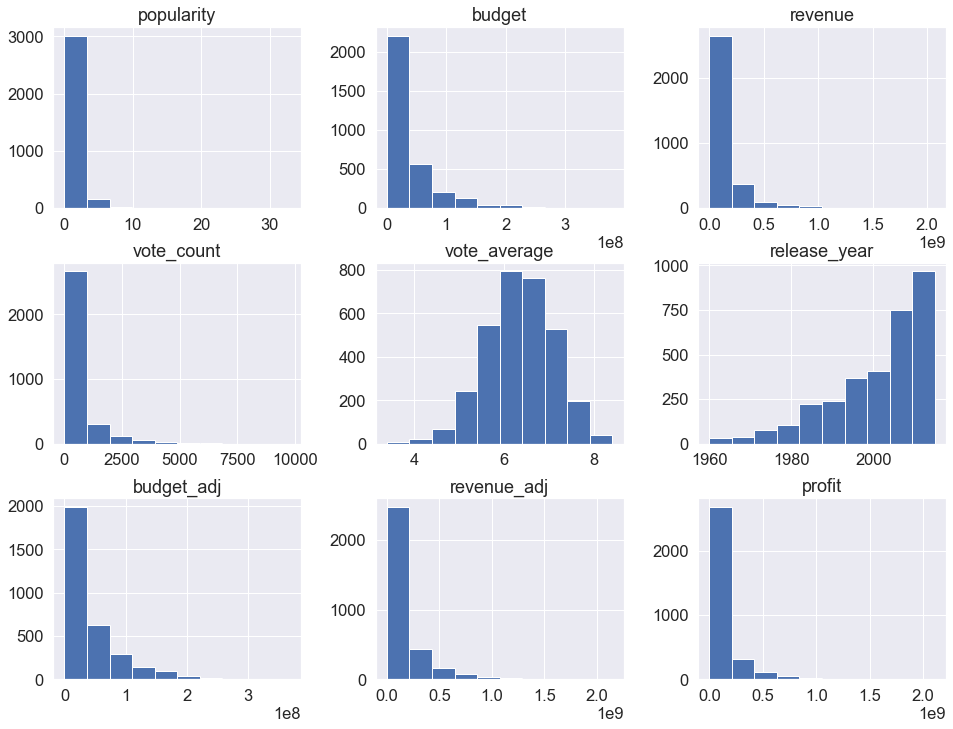

In [39]:
# Exploring general chracteristics in the profits data frame 
df_prof.hist(figsize=(16,12));

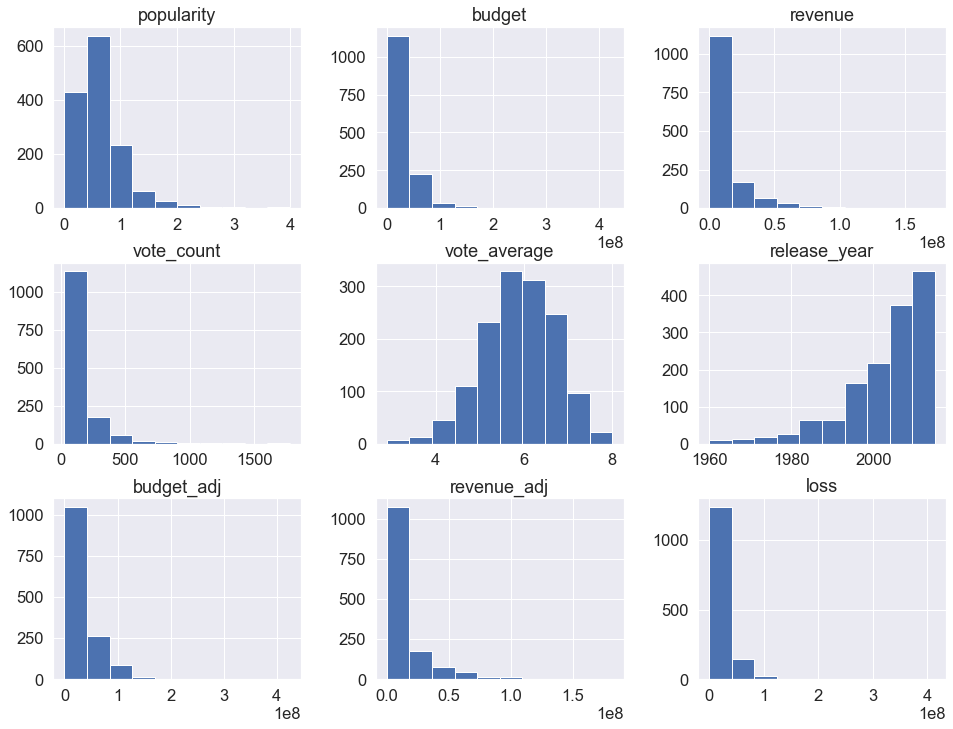

In [40]:
# Exploring general chracteristics in the loss data frame 
df_loss.hist(figsize=(16,12));

###  Q1- Waht are the top 5 movies That gained most profits, and How popular they were?
>- After sorting movies according to their profits, we found that **The Exorcist comes first** with about **2 billions and one hundred millions** of profits followed by Star Wars, Avatar, Jaws, and Titanic as shown below.
>- After that we went to see how was the relative popularity scores of these movies to give as some insights, and **Star Wars** comes first in popularity scores as shown below.

In [41]:
# Grouping movies by their title and then sorting them to get the top 5 movies with profits
top_prof = df_prof.groupby(['original_title']) ['profit'].mean().sort_values(ascending=False)[:5]
top_prof

original_title
The Exorcist   2108194372.00
Star Wars      2107908057.00
Avatar         1906596746.00
Jaws           1878643093.00
Titanic        1875791584.00
Name: profit, dtype: float64

> This visualization makes it more clear about our findings 
>>- **The Exorcist comes first** then Star Wars, Avatar, Jaws, and Titanic

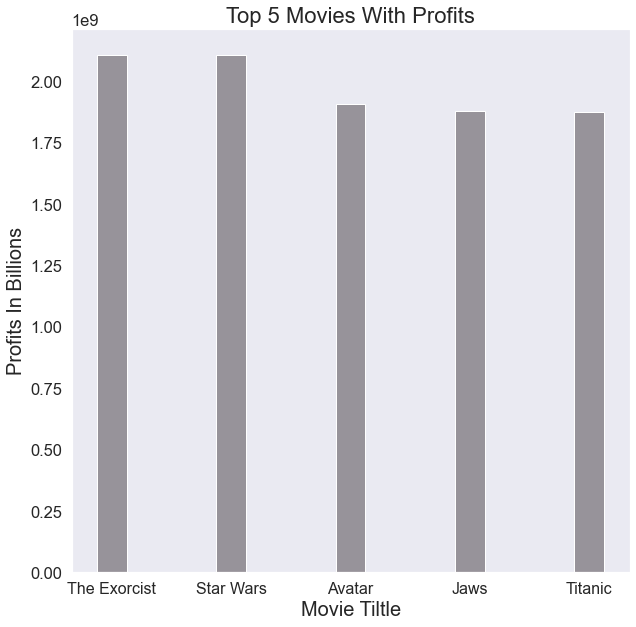

In [42]:
# Visualizing these findings in a bar chart 

plt.subplots(figsize=(10,10)) # The figure size

# modifying bar features
plt.bar(top_prof.index, top_prof, width=.25, color='#97939a') 

plt.title('Top 5 Movies With Profits', fontsize=22)
plt.xlabel('Movie Tiltle', fontsize=20)
plt.ylabel('Profits In Billions', fontsize=20)

plt.xticks(fontsize=16)
plt.show()

> Now, it is time to know how popular were these movies

In [43]:
# Getting the indicies of these movies
top_prof_pop_ind = [ ind for ind in top_prof.index]

#Making a data frame for them
df_top_prof_pop =df_prof[df_prof['original_title'].isin(top_prof_pop_ind)]
df_top_prof_pop

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1329,12.04,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,4428,7.90,1977,39575591,2147483648,2107908057
1386,9.43,237000000,1513461449,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.10,2009,240886902,2147483648,1906596746
5231,4.36,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,7.30,1997,271692064,2147483648,1875791584
9806,2.56,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1415,7.30,1975,28362748,1907005841,1878643093
10594,2.01,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1113,7.20,1973,39289276,2147483648,2108194372


> To be able to get more representative representation of the findings we will get the relative scores by dividing the popularity and average values by their mean

In [44]:
# Getting the average voting scores of these movies and the popularity scores 
top_prof_pop = df_top_prof_pop.groupby(['original_title'])['popularity'].mean()
top_prof_vote = df_top_prof_pop.groupby(['original_title'])['vote_average'].mean()

# Getting the relative scores
top_prof_pop = top_prof_pop / df_prof['popularity'].mean()
top_prof_vote = top_prof_vote / df_prof['vote_average'].mean()

# Showing results
top_prof_pop, top_prof_vote

(original_title
 Avatar         7.13
 Jaws           1.94
 Star Wars      9.09
 The Exorcist   1.52
 Titanic        3.29
 Name: popularity, dtype: float64,
 original_title
 Avatar         1.13
 Jaws           1.16
 Star Wars      1.26
 The Exorcist   1.14
 Titanic        1.16
 Name: vote_average, dtype: float64)

> As Shown **Star Wars** comes first with a big difference over all the others in popularity scores and a little bit higher in the average rating scores

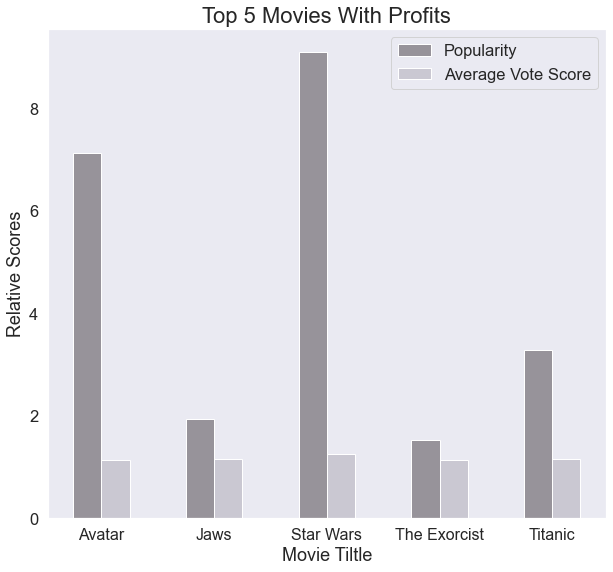

In [89]:
# indicis and width of the bar
ind = np.arange(len(top_prof_pop))
width=0.25

# Figure size
plt.subplots(figsize=(10,9))

# making the bar
plt.bar(ind, top_prof_pop, width, color='#97939a', label='Popularity')
plt.bar(ind + width, top_prof_vote, width, color='#cac8d2', label='Average Vote Score')

# Labels
plt.title('Top 5 Movies With Profits', fontsize=22)
plt.xlabel('Movie Tiltle', fontsize=18)
plt.ylabel('Relative Scores', fontsize=18)

# xticks labels and locations
labels = top_prof_pop.keys()
locations = ind + width / 2
plt.xticks(locations, labels, fontsize=16)

plt.legend() # Getting legend
plt.show()


### Q2- Waht are the top 5 movies assiociated with biggest loss in money, and How popular they were?
>- As shown below **The Warior's Way** movie lost the biggest amount of money which is about **4 Hundred Million Dollar!!** then the Long Ranger, Tha Alamo, The 13th Warrior, and Cutthroat Island with a loss that is approximately between 155 to 110 million dollar for each.

>- Considering the popularity of these movies 
>> Note that we depend on the average rating score as our operational definition of popularity as we mentioned before.
>>- there were some interesting findings as **all of them are above the average** for the average rating scores
>>- **The Warrior's Way** besides having the biggest loss in all movies at all times, it also has the top average rating score among the top 5 movies with biggest loss Followed by **The 13th Warrior**
>>>- You may be wondering why on earth these movies lost all thses amounts of money while they are above the average popularity scores?!
>>>- Long story short we can say that these movies were 'Not Bad' or 'Good' for the audience, but definitely they wree extremely terrible in the business world.


In [46]:
# Getting the top 5 movies with biggest loss
top_loss = df_loss.groupby(['original_title']) ['loss'].mean().sort_values(ascending=False)[:5]
top_loss

original_title
The Warrior's Way   413912431.00
The Lone Ranger     155110171.00
The Wolfman         150000000.00
The Alamo           137586847.00
The 13th Warrior    128681336.00
Name: loss, dtype: float64

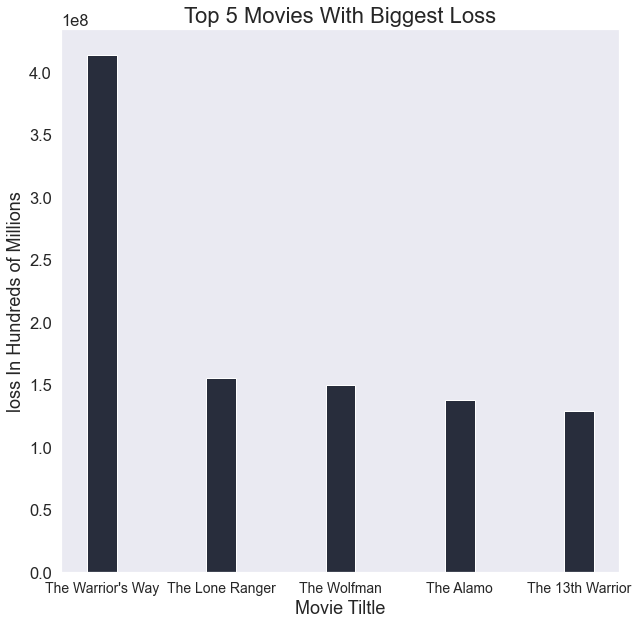

In [47]:
# Making the bar
plt.subplots(figsize=(10,10))

plt.bar(top_loss.index, top_loss, width=.25, color='#282D3C')

plt.title('Top 5 Movies With Biggest Loss', fontsize=22)
plt.xlabel('Movie Tiltle', fontsize=18)
plt.ylabel('loss In Hundreds of Millions', fontsize=18)

plt.xticks(fontsize=14)
plt.show()

> Now, let's see how popular were these movies

In [48]:
# Getting the indicies of these movies
top_loss_pop_ind = [ ind for ind in top_loss.index]

#Making a data frame for them
df_top_loss_pop =df_loss[df_loss['original_title'].isin(top_loss_pop_ind)]
df_top_loss_pop

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,loss
2069,0.64,150000000,0,The Wolfman,Benicio del Toro|Anthony Hopkins|Emily Blunt|H...,Joe Johnston,Horror|Thriller|Drama,Universal Pictures|Stuber Productions|Relativi...,299,5.40,2010,150000000,0,150000000
2244,0.25,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,74,6.40,2010,425000000,11087569,413912431
2435,1.19,160000000,61698899,The 13th Warrior,Antonio Banderas|Vladimir Kulich|Dennis StorhÃ...,John McTiernan,Adventure|Fantasy|Action,Touchstone Pictures,275,6.20,1999,209448455,80767119,128681336
5508,1.21,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,1607,6.00,2013,238688504,83578333,155110171
7031,0.95,145000000,25819961,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,Western|History|War,Imagine Entertainment|Touchstone Pictures,60,5.90,2004,167394582,29807735,137586847


In [49]:
# Getting Popularity Scores
top_loss_pop = df_top_loss_pop.groupby(['original_title'])['popularity'].mean()
top_loss_vote = df_top_loss_pop.groupby(['original_title'])['vote_average'].mean()
top_loss_pop, top_loss_vote

(original_title
 The 13th Warrior    1.19
 The Alamo           0.95
 The Lone Ranger     1.21
 The Warrior's Way   0.25
 The Wolfman         0.64
 Name: popularity, dtype: float64,
 original_title
 The 13th Warrior    6.20
 The Alamo           5.90
 The Lone Ranger     6.00
 The Warrior's Way   6.40
 The Wolfman         5.40
 Name: vote_average, dtype: float64)

> To be able to get more representative representation of the findings we will get the relative scores by dividing the popularity and average values by their mean

In [50]:
# Relative popularity scores
top_loss_pop = top_loss_pop / df_loss['popularity'].mean()
top_loss_vote = top_loss_vote / df_loss['vote_average'].mean()
top_loss_pop, top_loss_vote

(original_title
 The 13th Warrior    1.81
 The Alamo           1.44
 The Lone Ranger     1.85
 The Warrior's Way   0.38
 The Wolfman         0.98
 Name: popularity, dtype: float64,
 original_title
 The 13th Warrior    1.05
 The Alamo           1.00
 The Lone Ranger     1.02
 The Warrior's Way   1.09
 The Wolfman         0.92
 Name: vote_average, dtype: float64)

> As we mentioned above all of them are **above the average** for the average rating score with
>>- **The Warrior's Way** has the top average rating scores Followed by The 13th Warrior, Cutthroat Island, The Lone Ranger, and The Alamo

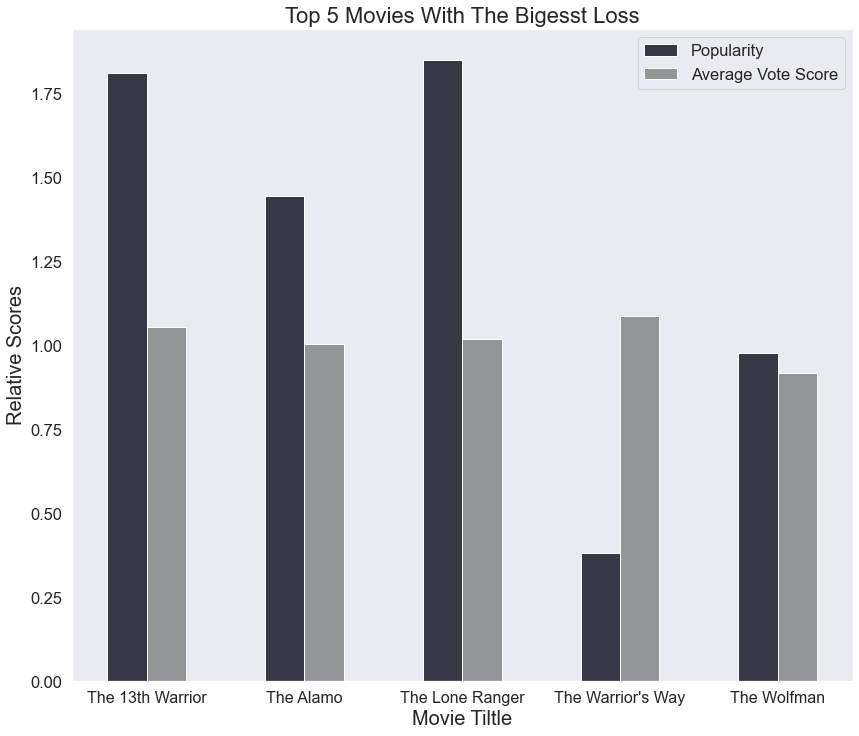

In [51]:
# indicis and width of the bar
ind = np.arange(len(top_prof_pop))
width=0.25

# Figure size
plt.subplots(figsize=(14,12))

# making the bar
plt.bar(ind, top_loss_pop, width, color='#363945', label='Popularity')
plt.bar(ind + width, top_loss_vote, width, color='#939597', label='Average Vote Score')

# Labels
plt.title('Top 5 Movies With The Bigesst Loss', fontsize=22)
plt.xlabel('Movie Tiltle', fontsize=20)
plt.ylabel('Relative Scores', fontsize=20)

# xticks labels and locations
labels = top_loss_pop.keys()
locations = ind + width / 2
plt.xticks(locations, labels, fontsize=16)

plt.legend() # Getting legend

plt.show()


### Q3- Waht are the top 5 popular movies, and How were their profits ?
>- The top 5 movies were **The Shawshank Redemption** followed by The Godfather, Whiplash, Forrest Gump, and Fight Club respectively as shown below.     

>- For the profits of the top popular movies

>>- **The Godfather** was the first with about a billion and 250 million followed by **Forrest Gump** which made about 9 hundred million and those two were too much higher than the others as it is much more clearer in the chart below

>>- The most shocking finding was that the most popular movie at all times, **The Shawshank Redemption** made only less than **5 Million!!!** and yes, I did not miss any zeros here or there. This profit is considered much more less than the average profits that winning movies -movies that earned profits- made which is about **One Hundred Million!!**


>

>>- I decided to depend on the **Average Voting** column not **Popularity** column to guide my analysis because the way of calculating it is not clear that much as mentioned before
>>- we used more restricted way to reduce bias in calculating popularity with average voting scores for this analysis by excluding all values with vote count less than 100 to get more precise results as possible as we mentioned before

In [52]:
# Getting values with vote count more than 100
df_prof_fav = df_prof.query('vote_count > 100')
df_prof_fav.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,137999939,1392445892,1254445953
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,137999939,348161292,210161353
2,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.30,2015,101199955,271619025,170419070
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.50,2015,183999919,1902723129,1718723210
4,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.30,2015,174799923,1385748801,1210948878


In [53]:
# Getting the top 5 popular movies
top_mov_fav = df_prof_fav.groupby(['original_title']) ['vote_average'].mean().sort_values(ascending=False)[:5]
top_mov_fav

original_title
The Shawshank Redemption   8.40
The Godfather              8.30
Whiplash                   8.20
The Godfather: Part II     8.10
Fight Club                 8.10
Name: vote_average, dtype: float64

In [54]:
# Getting the indicies of these movies
top_mov_fav_ind = [ind for ind in top_mov_fav.index] 

#Making a data frame for them
df_top_mov_fav_prof = df_prof[df_prof['original_title'].isin(top_mov_fav_ind)]
df_top_mov_fav_prof

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
650,4.78,3300000,13993093,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,2372,8.20,2014,3039600,12888912,9849312
2409,8.95,63000000,100853753,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,5923,8.10,1999,82470329,132022892,49552563
4178,7.19,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,Drama|Crime,Castle Rock Entertainment,5754,8.40,1994,36777789,41693462,4915673
7269,5.74,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,Drama|Crime,Paramount Pictures|Alfran Productions,3970,8.30,1972,31287365,1277913732,1246626367
9758,3.26,13000000,47542841,The Godfather: Part II,Al Pacino|Robert Duvall|Diane Keaton|Robert De...,Francis Ford Coppola,Drama|Crime,Paramount Pictures|The Coppola Company,2131,8.10,1974,57489690,210247939,152758249


In [55]:
# Getting popularity values scores from popularity column
top_mov_pop = df_top_mov_fav_prof.groupby(['original_title']) ['popularity'].mean()
top_mov_pop

original_title
Fight Club                 8.95
The Godfather              5.74
The Godfather: Part II     3.26
The Shawshank Redemption   7.19
Whiplash                   4.78
Name: popularity, dtype: float64

In [56]:
# Getting RElative scores
top_mov_pop /= df_prof_fav['popularity'].mean()
top_mov_fav /= df_prof_fav['vote_average'].mean()

top_mov_pop, top_mov_fav

(original_title
 Fight Club                 5.56
 The Godfather              3.56
 The Godfather: Part II     2.03
 The Shawshank Redemption   4.47
 Whiplash                   2.97
 Name: popularity, dtype: float64,
 original_title
 The Shawshank Redemption   1.32
 The Godfather              1.30
 Whiplash                   1.29
 The Godfather: Part II     1.27
 Fight Club                 1.27
 Name: vote_average, dtype: float64)

>- As Mentioned the top 5 popular are **The Shawshank Redemption followed by The Godfather, Whiplash, Forrest Gump, and Fight Club** respectively.

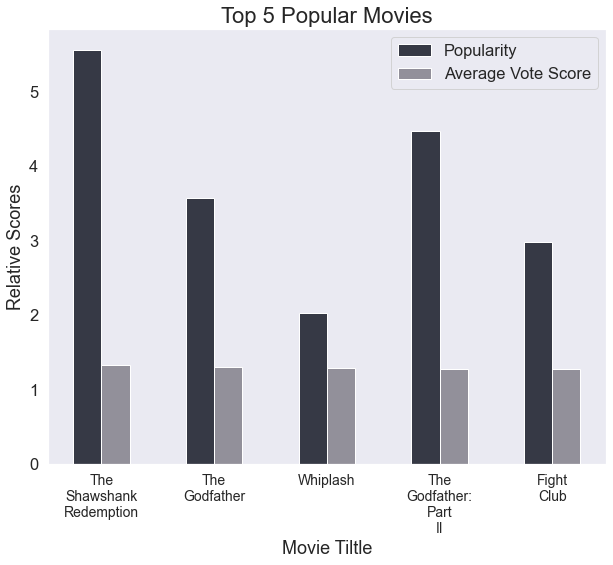

In [98]:
# indicis and width of the bar
ind = np.arange(len(top_mov_fav))
width=0.25

# Figure size
plt.subplots(figsize=(10,8))

# making the bar
plt.bar(ind, top_mov_pop, width, color='#363945', label='Popularity')
plt.bar(ind + width, top_mov_fav, width, color='#92909a', label='Average Vote Score')


# Labels
plt.title('Top 5 Popular Movies', fontsize=22)
plt.xlabel('Movie Tiltle', fontsize=18)
plt.ylabel('Relative Scores', fontsize=18)

# xticks labels and locations
labels = top_mov_fav.keys()
labels = [x.replace(' ', '\n') for x in labels]
locations = ind + width / 2
plt.xticks(locations, labels, fontsize=14)


plt.legend() # Getting legend
plt.show()

In [58]:
# Getting these movies profits
top_mov_fav_prof = df_top_mov_fav_prof.groupby('original_title') ['profit'].mean()
top_mov_fav_prof

original_title
Fight Club                    49552563
The Godfather               1246626367
The Godfather: Part II       152758249
The Shawshank Redemption       4915673
Whiplash                       9849312
Name: profit, dtype: int64

In [59]:
# Get results in millions
top_mov_fav_prof /= (10**6)
top_mov_fav_prof

original_title
Fight Club                   49.55
The Godfather              1246.63
The Godfather: Part II      152.76
The Shawshank Redemption      4.92
Whiplash                      9.85
Name: profit, dtype: float64

>- As we previously said **The Godfather** was the first with about a billion and 250 million followed by **Forrest Gump** which made about 9 hundred million and those two were too much higher than the others 
>- These differences are very obvious in this chart, with some shocking findings as for **The Shawshank Redemption**

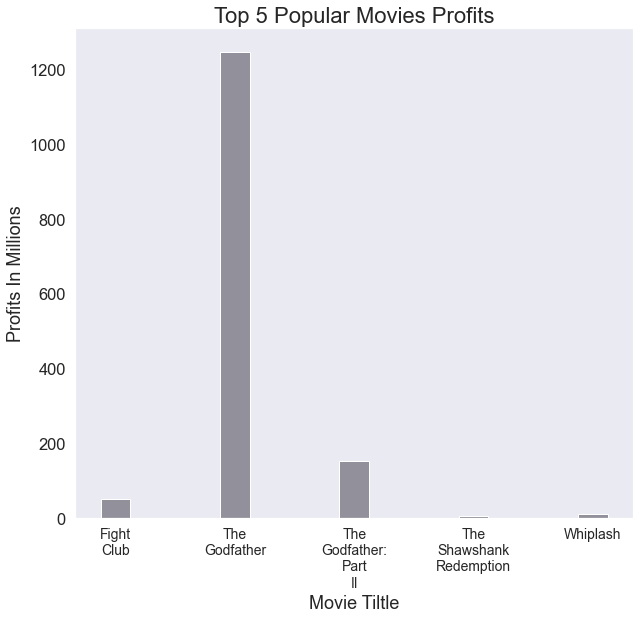

In [125]:
# Making the bar
plt.subplots(figsize=(10,9))

plt.bar(top_mov_fav_prof.index, top_mov_fav_prof, width=.25, color='#92909a')

plt.title('Top 5 Popular Movies Profits', fontsize=22)
plt.xlabel('Movie Tiltle', fontsize=18)
plt.ylabel('Profits In Millions', fontsize=18)

# setting xticks
pos, labels = plt.xticks()
labels = top_mov_fav_prof.keys()
labels = [x.replace(' ', '\n') for x in labels]
plt.xticks(pos, labels, fontsize=14)
plt.show()

## Q4- Who are the top 5 directors associated with movies That was most popular?

> We get these by getting the top 5 directors with higher average voting score per movie 

>> In order to get more precise results as mentioned before we compared between the most 100 director that participated in movies with our defined popularity measure which are average voting scores for all of their movies

>  

> The top 5 directors were **Christopher Nolan, Quentin Tarantino, Wes Anderson, Stanley Kubrick, and Martin Scorsese** respectively as shown below.   

In [61]:
# Getting the top 100 indicis
direc_top = df_prof_fav['director'].value_counts().sort_values(ascending=False) [:100]
top_direc_fav_ind = [ind for ind in direc_top.index] 

# Making a new dataframe for them
df_top_direc_fav = df_prof_fav[df_prof_fav['director'].isin(top_direc_fav_ind)]
df_top_direc_fav.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,137999939,348161292,210161353
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.50,2015,183999919,1902723129,1718723210
7,7.67,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,4572,7.60,2015,99359956,547749654,448389698
10,6.20,245000000,880674609,Spectre,Daniel Craig|Christoph Waltz|LÃ©a Seydoux|Ralp...,Sam Mendes,Action|Adventure|Crime,Columbia Pictures|Danjaq|B24,3254,6.20,2015,225399900,810220283,584820383
13,5.98,88000000,243637091,Pixels,Adam Sandler|Michelle Monaghan|Peter Dinklage|...,Chris Columbus,Action|Comedy|Science Fiction,Columbia Pictures|Happy Madison Productions,1575,5.80,2015,80959964,224146025,143186061


In [62]:
# average rating scores
top_direc_fav = df_top_direc_fav.groupby(['director']) ['vote_average'].mean().sort_values(ascending=False)[:5]
top_direc_fav 

director
Christopher Nolan   7.64
Quentin Tarantino   7.52
Wes Anderson        7.50
Stanley Kubrick     7.45
Martin Scorsese     7.35
Name: vote_average, dtype: float64

In [63]:
# Getting the indicis of favorites
top_direc_pop_ind = [ind for ind in top_direc_fav.index] 

# Making a new dataframe for them
df_top_direc_pop = df_prof_fav[df_prof_fav['director'].isin(top_direc_pop_ind)]
df_top_direc_pop.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
15,5.90,44000000,155760117,The Hateful Eight,Samuel L. Jackson|Kurt Russell|Jennifer Jason ...,Quentin Tarantino,Crime|Drama|Mystery|Western,Double Feature Films|The Weinstein Company|Fil...,2389,7.40,2015,40479982,143299244,102819262
629,24.95,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,6498,8.00,2014,151980023,572690645,420710622
649,4.93,30000000,174600318,The Grand Budapest Hotel,Ralph Fiennes|Tony Revolori|F. Murray Abraham|...,Wes Anderson,Comedy|Drama,Fox Searchlight Pictures|Scott Rudin Productio...,2802,7.90,2014,27632731,160822790,133190059
1387,6.10,70000000,319131050,Inglourious Basterds,Brad Pitt|MÃ©lanie Laurent|Christoph Waltz|Eli...,Quentin Tarantino,Drama|Action|Thriller|War,Universal Pictures|A Band Apart|Zehnte Babelsb...,3969,7.70,2009,71148030,324364937,253216907
1412,1.83,40000000,46471023,Fantastic Mr. Fox,George Clooney|Meryl Streep|Jason Schwartzman|...,Wes Anderson,Adventure|Animation|Comedy|Family,Twentieth Century Fox Film Corporation|Regency...,711,7.50,2009,40656017,47233167,6577150


In [64]:
# Popularity score
top_direc_pop = df_top_direc_pop.groupby(['director']) ['popularity'].mean()
top_direc_pop

director
Christopher Nolan   7.70
Martin Scorsese     2.13
Quentin Tarantino   5.09
Stanley Kubrick     2.07
Wes Anderson        2.11
Name: popularity, dtype: float64

>- This chart represents The top 5 directors who are **Christopher Nolan, Quentin Tarantino, Wes Anderson, Stanley Kubrick, and Martin Scorsese** respectively alongside with their average voting score and popularity score.   

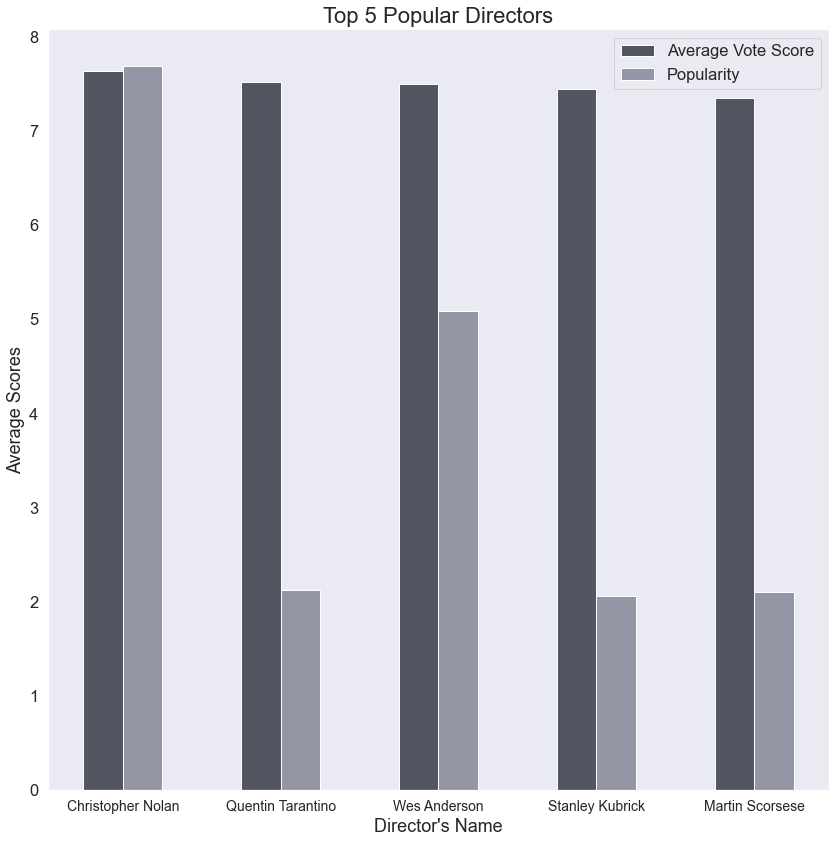

In [65]:
# indicis and width of the bar
ind = np.arange(len(top_direc_fav))
width=0.25

# Figure size
plt.subplots(figsize=(14,14))

# making the bar
plt.bar(ind , top_direc_fav, width, color='#525660', label='Average Vote Score')
plt.bar(ind+ width, top_direc_pop, width, color='#9495a5', label='Popularity')

# Labels
plt.title('Top 5 Popular Directors', fontsize=22)
plt.xlabel("Director's Name", fontsize=18)
plt.ylabel('Average Scores', fontsize=18)

# xticks labels and locations
labels = top_direc_fav.keys()
locations = ind + width / 2
plt.xticks(locations, labels, fontsize=14)


plt.legend()  # Getting legend
plt.show()

## Q5- What are the top 5 production companies that their movies gained the biggest profits overall?
> Getting the total Profits for all movies that those companies were a part of, and then representing the top 5 of them.

>

> The top 5 were **Warner Bros, Universal Pictures, Paramount Pictures, Twentieth Century Fox Film Corporation, and Walt Disney Pictures** respectively

In [66]:
# Making a new dataframe for production companies
df_produc = df_money.copy()

# Spliting column so each value is in a row
df_produc['production_companies'] = df_produc['production_companies'].apply(lambda  x: x.split('|'))

# Adding each company into a new row
df_produc = df_produc.explode('production_companies', ignore_index=True)
df_produc.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,change
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios,5562,6.50,2015,137999939,1392445892,1254445953
1,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,5562,6.50,2015,137999939,1392445892,1254445953
2,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,5562,6.50,2015,137999939,1392445892,1254445953
3,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,5562,6.50,2015,137999939,1392445892,1254445953
4,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Dentsu,5562,6.50,2015,137999939,1392445892,1254445953


>- Here we added all the profits of a company using the change column which contains the profits and loss of a company to get more precise results

In [67]:
# Top production companies profits
top_produc_fav = df_produc.groupby('production_companies') ['change'].sum().sort_values(ascending=False) [:5]
top_produc_fav

production_companies
Warner Bros.                              46010204003
Universal Pictures                        44258038722
Paramount Pictures                        39869029273
Twentieth Century Fox Film Corporation    36919411866
Walt Disney Pictures                      25942171284
Name: change, dtype: int64

>- Showing The top 5 companies which are **Warner Bros, Universal Pictures, Paramount Pictures, Twentieth Century Fox Film Corporation, and Walt Disney Pictures** respectively with their profits

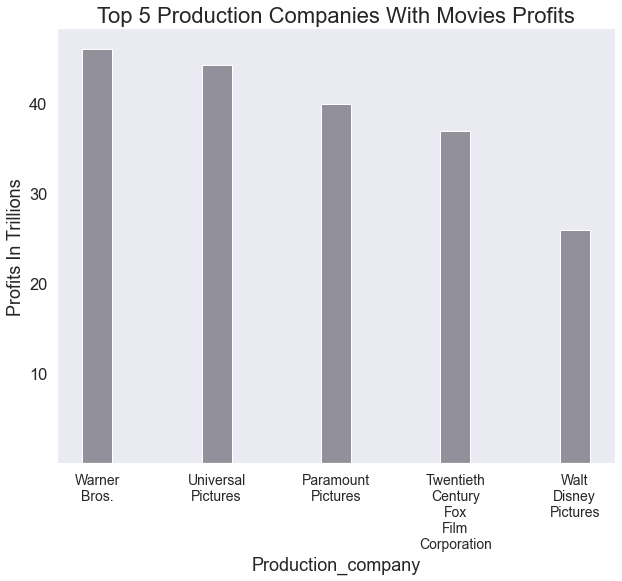

In [128]:
# Making the bar
plt.subplots(figsize=(10,8))

plt.bar(top_produc_fav.index, top_produc_fav, width=.25, color='#92909a')

plt.title('Top 5 Production Companies With Movies Profits', fontsize=22)
plt.xlabel('Production_company', fontsize=18)
plt.ylabel('Profits In Trillions', fontsize=18)

# setting xticks
pos, labels = plt.xticks()
labels = top_produc_fav.keys()
labels = [x.replace(' ', '\n') for x in labels]
plt.xticks(pos, labels, fontsize=14)

# yticks
yvalues = [1e10, 2e10, 3e10, 4e10]
ylabs = [10, 20, 30, 40]
plt.yticks(yvalues, ylabs)
plt.show()

## Q6- Waht are the top 10 Genres associated with movies That gained most profits?

> Getting the Average profits of movies associated with a particular genre and then getting the top 10 of them

>The top 10 are **Animation, Adventure, Family, Fantasy, Science Fiction, Action, Music, War, Western, and Romance** respectively

In [69]:
# Making a new dataframe for genres
df_gen = df_prof_fav.copy()

# Spliting column so each value is in a row
df_gen['genres'] = df_gen['genres'].apply(lambda  x: x.split('|'))

# Adding each value into a row
df_gen = df_gen.explode('genres', ignore_index=True)
df_gen.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,137999939,1392445892,1254445953
1,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Adventure,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,137999939,1392445892,1254445953
2,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,137999939,1392445892,1254445953
3,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,137999939,1392445892,1254445953
4,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,137999939,348161292,210161353


In [70]:
# Top generes with profits
top_gen_prof = df_gen.groupby('genres') ['profit'].mean().sort_values(ascending=False) [:10]
top_gen_prof

genres
Animation         276175840.60
Adventure         271107646.10
Family            248760574.17
Fantasy           241762850.67
Science Fiction   208523493.51
Action            201746494.93
Music             175853371.80
War               160803139.99
Western           154479286.79
Romance           135074954.94
Name: profit, dtype: float64

>- The Top 10 are **Animation, Adventure, Family, Fantasy, Science Fiction, Action, Music, War, Western, and Romance** respectively is represented clearly here

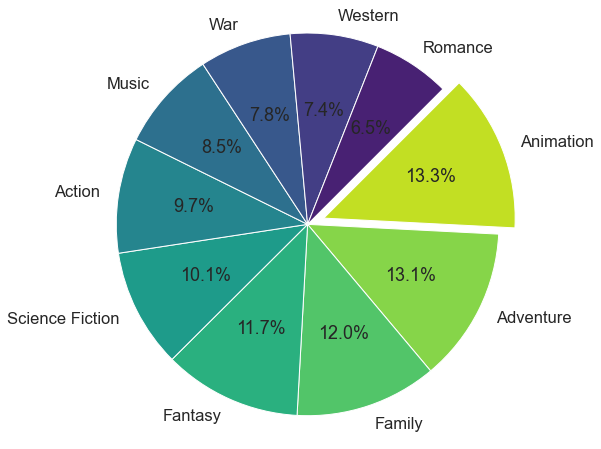

In [153]:
plt.figure(figsize=[10,8])
labels = top_gen_prof.keys()
colors = sns.color_palette('viridis_r', len(labels))
lst = [0 for x in range(len(labels)-1)]
explode = [0.1, *lst]
# plotting the pie
plt.pie(x=top_gen_prof, labels=labels, startangle=45, counterclock=False,
        autopct='%1.1f%%', colors=colors, radius=1.1, explode=explode);

## Q7- Waht are the top 10 Genres associated with movies That was most popular?

> Getting the Average rating scores of movies associated with a particular genre and then getting the top 10 of them

> The Top 10 are **History, Documentary, War, Western, Drama , Music, Animation, Crime, Mystery, and Romance** respectively




In [72]:
# Popularity of genres using vote scores
top_gen_fav = df_gen.groupby('genres') ['vote_average'].mean().sort_values(ascending=False) [:10]
top_gen_fav

genres
Documentary   7.15
War           6.86
History       6.86
Western       6.73
Drama         6.66
Music         6.60
Animation     6.55
Crime         6.49
Mystery       6.42
Romance       6.41
Name: vote_average, dtype: float64

In [73]:
# Getting indicis
top_gen_pop_ind = [ind for ind in top_gen_fav.index] 

# Making a new dataframe for them
df_top_gen_pop = df_gen[df_gen['genres'].isin(top_gen_pop_ind)]
df_top_gen_pop.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
16,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Crime,Universal Pictures|Original Film|Media Rights ...,2947,7.30,2015,174799923,1385748801,1210948878
18,9.11,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.20,2015,124199945,490314247,366114302
19,9.11,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Drama,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.20,2015,124199945,490314247,366114302
26,7.67,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Drama,Twentieth Century Fox Film Corporation|Scott F...,4572,7.60,2015,99359956,547749654,448389698
30,7.40,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,Animation,Universal Pictures|Illumination Entertainment,2893,6.50,2015,68079970,1064192016,996112046


In [74]:
# Popularity scores
top_gen_pop = df_top_gen_pop.groupby('genres') ['popularity'].mean().sort_values(ascending=False) [:10]
top_gen_pop

genres
Animation     2.06
Western       1.69
War           1.69
Mystery       1.56
Crime         1.46
Drama         1.41
Music         1.36
Romance       1.31
History       1.25
Documentary   0.52
Name: popularity, dtype: float64

>-  The Top 10 which are **History, Documentary, War, Western, Drama , Music, Animation, Crime, Mystery, and Romance** respectively are represented clearly here

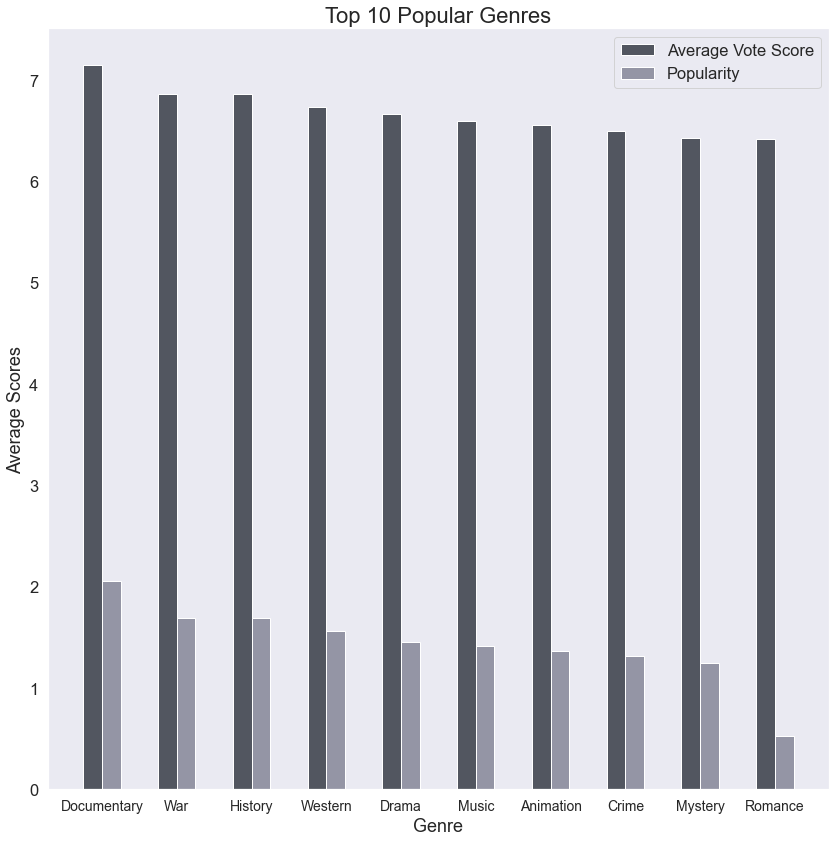

In [75]:
# indicis and width of the bar
ind = np.arange(len(top_gen_fav))
width=0.25

# Figure size
plt.subplots(figsize=(14,14))

# making the bar
plt.bar(ind , top_gen_fav, width, color='#525660', label='Average Vote Score')
plt.bar(ind+ width, top_gen_pop, width, color='#9495a5', label='Popularity')

# Labels
plt.title('Top 10 Popular Genres', fontsize=22)
plt.xlabel("Genre", fontsize=18)
plt.ylabel('Average Scores', fontsize=18)

# xticks labels and locations
labels = top_gen_fav.keys()
locations = ind + width / 2
plt.xticks(locations, labels, fontsize=14)

plt.legend()  # Getting legend
plt.show()

## Q8- Who are The top 5 Actors associated with movies That was most popular, and How were their profits?

> In order to get more precise results as mentioned before we compared between the top 100 actors with highest number of movies that they participated in, with our defined popularity measure which is the average voting scores for all of their movies

>- Getting the Average rating scores of movies associated with an actor and then getting the top 5 actors to know the popularity of those actors 

>- Getting the average profits of movies associated with those actors

> The most popular actors are **Leonardo DiCaprio, Tom Hanks, Al Pacino, Sean Penn, and Rachel McAdams** respectively

> Considering their average profits for movies they came in the following sequence **Leonardo DiCaprio at first then Tom Hanks, Rachel McAdams, Al Pacino, and Sean Penn**


In [76]:
# Making a new dataframe
df_actor = df_prof_fav.copy()

# Spliting values in column
df_actor['cast'] = df_actor['cast'].apply(lambda  x: x.split('|'))

# Adding each value into a seperate column
df_actor = df_actor.explode('cast', ignore_index=True)
df_actor.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,137999939,1392445892,1254445953
1,32.99,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,137999939,1392445892,1254445953
2,32.99,150000000,1513528810,Jurassic World,Irrfan Khan,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,137999939,1392445892,1254445953
3,32.99,150000000,1513528810,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,137999939,1392445892,1254445953
4,32.99,150000000,1513528810,Jurassic World,Nick Robinson,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,137999939,1392445892,1254445953


In [77]:
# Getting the top 100 indicis
df_top_actor = df_actor['cast'].value_counts().sort_values(ascending=False) [:100]
top_actor_ind = [ind for ind in df_top_actor.index] 

# Making a new dataframe for them
df_top_actor_fav = df_actor[df_actor['cast'].isin(top_actor_ind)]
df_top_actor_fav.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
15,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.50,2015,183999919,1902723129,1718723210
20,9.34,190000000,1506249360,Furious 7,Vin Diesel,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.30,2015,174799923,1385748801,1210948878
22,9.34,190000000,1506249360,Furious 7,Jason Statham,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.30,2015,174799923,1385748801,1210948878
24,9.34,190000000,1506249360,Furious 7,Dwayne Johnson,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.30,2015,174799923,1385748801,1210948878
25,9.11,135000000,532950503,The Revenant,Leonardo DiCaprio,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.20,2015,124199945,490314247,366114302


In [78]:
# Popularity scores
top_actor_fav = df_top_actor_fav.groupby('cast') ['vote_average'].mean().sort_values(ascending=False) [:5]
top_actor_fav

cast
Leonardo DiCaprio   7.13
Tom Hanks           6.89
Jake Gyllenhaal     6.87
Mark Ruffalo        6.86
Brad Pitt           6.84
Name: vote_average, dtype: float64

In [79]:
# Getting the indicis
top_actor_pop_ind = [ind for ind in top_actor_fav.index] 

# Making a new dataframe for them
df_top_actor_pop = df_actor[df_actor['cast'].isin(top_actor_pop_ind)]
df_top_actor_pop

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
25,9.11,135000000,532950503,The Revenant,Leonardo DiCaprio,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.20,2015,124199945,490314247,366114302
72,5.94,280000000,1405035767,Avengers: Age of Ultron,Mark Ruffalo,Joss Whedon,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4304,7.40,2015,257599886,1292632336,1035032450
105,5.34,30000000,91709827,Southpaw,Jake Gyllenhaal,Antoine Fuqua,Action|Drama,Escape Artists|Riche-Ludwig Productions,1386,7.30,2015,27599987,84373003,56773016
123,4.65,28000000,133346506,The Big Short,Brad Pitt,Adam McKay,Comedy|Drama,Paramount Pictures|Plan B Entertainment|Regenc...,1545,7.30,2015,25759988,122678731,96918743
140,4.06,20000000,88346473,Spotlight,Mark Ruffalo,Tom McCarthy,Drama|Thriller|History,Participant Media|Open Road Films|Anonymous Co...,1559,7.80,2015,18399991,81278719,62878728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10884,2.15,18000000,151668774,Big,Tom Hanks,Penny Marshall,Fantasy|Drama|Comedy|Romance|Family,Gracie Films|Twentieth Century Fox Film Corpor...,564,6.70,1988,33190038,279660690,246470652
11569,1.29,26000000,206678440,Philadelphia,Tom Hanks,Jonathan Demme,Drama|Mystery,TriStar Pictures,514,7.50,1993,39246219,311974896,272728677
11609,0.94,21000000,227799884,Sleepless in Seattle,Tom Hanks,Nora Ephron,Comedy|Drama|Romance,TriStar Pictures,362,6.40,1993,31698869,343857082,312158213
11650,0.79,11000000,30000000,What's Eating Gilbert Grape,Leonardo DiCaprio,Lasse HallstrÃ¶m,Romance|Drama,Paramount Pictures,495,7.40,1993,16604169,45284098,28679929


In [80]:
# Popularity scores from popularity column
top_actor_pop = df_top_actor_pop.groupby('cast') ['popularity'].mean().sort_values(ascending=False) [:5]
top_actor_pop

cast
Leonardo DiCaprio   3.24
Mark Ruffalo        2.82
Brad Pitt           2.29
Jake Gyllenhaal     2.28
Tom Hanks           1.96
Name: popularity, dtype: float64

>- Showing the top 5 popularity scores for the top 5 popular actors who are **Leonardo DiCaprio, Tom Hanks, Al Pacino, Sean Penn, and Rachel McAdams** respectively

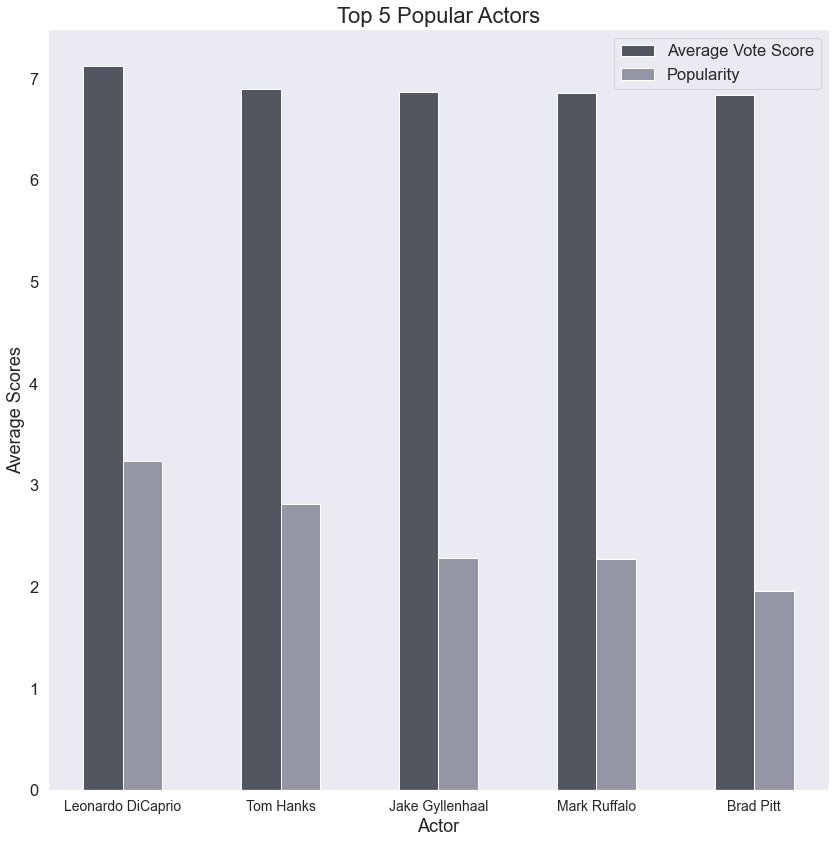

In [81]:
# indicis and width of the bar
ind = np.arange(len(top_direc_fav))
width=0.25

# Figure size
plt.subplots(figsize=(14,14))

# making the bar
plt.bar(ind , top_actor_fav, width, color='#525660', label='Average Vote Score')
plt.bar(ind+ width, top_actor_pop, width, color='#9495a5', label='Popularity')

# Labels
plt.title('Top 5 Popular Actors', fontsize=22)
plt.xlabel("Actor", fontsize=18)
plt.ylabel('Average Scores', fontsize=18)

# xticks labels and locations
labels = top_actor_fav.keys()
locations = ind + width / 2
plt.xticks(locations, labels, fontsize=14)


plt.legend()    # Getting legend
plt.show()

> Now, Let's See Their Average Profits per  Movie

In [82]:
# Profits of popular actors
top_actor_pop_prof = df_top_actor_pop.groupby('cast') ['profit'].mean().sort_values(ascending=False) [:5]
top_actor_pop_prof

cast
Leonardo DiCaprio   304876882.94
Tom Hanks           262429472.26
Mark Ruffalo        219137348.50
Brad Pitt           166651944.52
Jake Gyllenhaal     102697015.57
Name: profit, dtype: float64

>- As Shown here the these are the average profits for movies of those actors With **Leonardo DiCaprio** in the head followed by **Tom Hanks, Rachel McAdams, Al Pacino, and Sean Penn** respectively

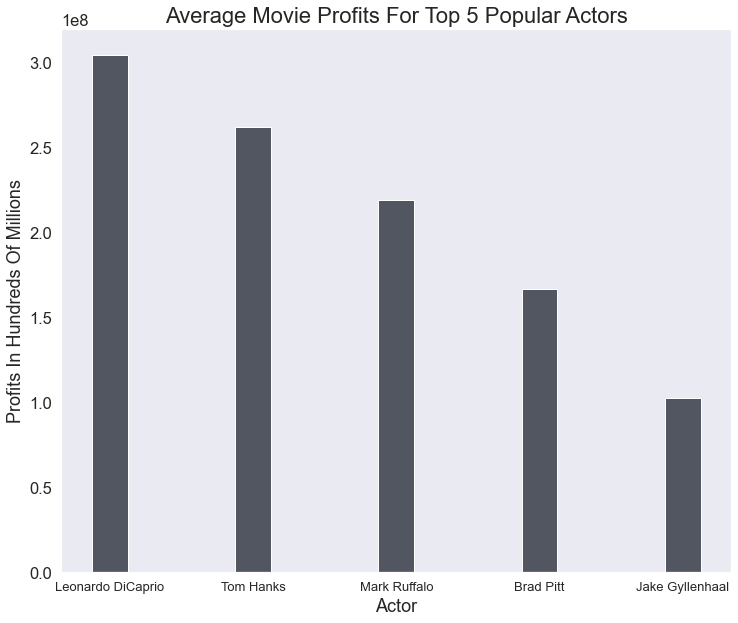

In [151]:
# Making the bar
plt.subplots(figsize=(12,10))

plt.bar(top_actor_pop_prof.index, top_actor_pop_prof, width=.25, color='#525660')

plt.title('Average Movie Profits For Top 5 Popular Actors', fontsize=22)
plt.xlabel('Actor', fontsize=18)
plt.ylabel('Profits In Hundreds Of Millions', fontsize=18)

plt.xticks(fontsize=13)
plt.show()

### Q9- Who are The top 5 Actors associated with movies That gained most profits, and How popular they were?

> In order to get more precise results as mentioned before we compared between the top 100 actors with highest number of movies that they participated in with popularity, and our defined popularity measure for average voting scores for all of their movies

>- Getting the Average profits of movies associated with an actor, then getting the top 5 actors of them

>- Then Getting their average popularity scores from average rating scores of their movies

> The top 5 actors associated with movies that gained the most profits were **Harrison Ford, Robert Downey Jr., Sean Connery, Ralph Fiennes, and Will Smith** respectively

>

> Considering their popularity they came in the following sequence **Robert Downey Jr.** came first then **Ralph Fiennes,  Harrison Ford, Sean Connery, and Will Smith**

In [84]:
# top actors with profits
top_actor_prof = df_top_actor_fav.groupby('cast') ['profit'].mean().sort_values(ascending=False) [:5]
top_actor_prof

cast
Harrison Ford       435236597.15
Robert Downey Jr.   349119228.00
Sean Connery        345764075.89
Ralph Fiennes       320120247.83
Will Smith          308632693.44
Name: profit, dtype: float64

>- Representing the top 5 actors associated with profits who are **Harrison Ford, Robert Downey Jr., Sean Connery, Ralph Fiennes, and Will Smith** respectively

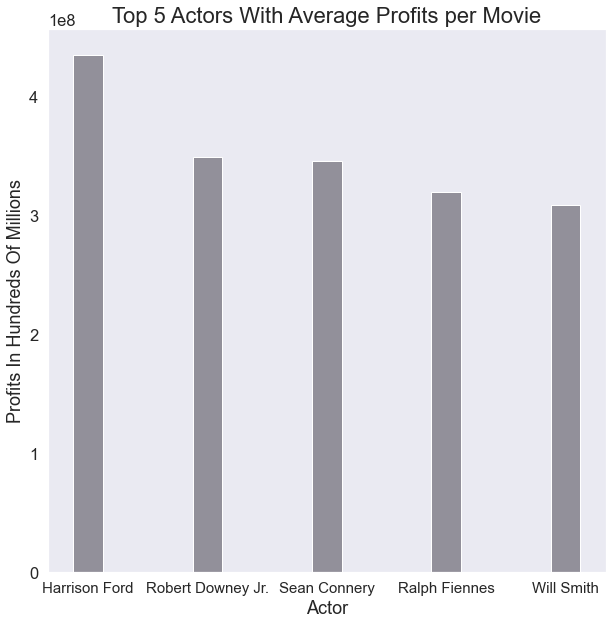

In [85]:
# Making the bar
plt.subplots(figsize=(10,10))

plt.bar(top_actor_prof.index, top_actor_prof, width=.25, color='#92909a')

plt.title('Top 5 Actors With Average Profits per Movie', fontsize=22)
plt.xlabel('Actor', fontsize=18)
plt.ylabel('Profits In Hundreds Of Millions', fontsize=18)

plt.xticks(fontsize=15)
plt.show()

> Now, Let's See the average popularity of movies associated with those actors

In [86]:
# Getting the indicis
top_actor_prof_ind = [ind for ind in top_actor_prof.index] 

# Making a new dataframe for them
df_big_actor_prof = df_actor[df_actor['cast'].isin(top_actor_prof_ind)]
df_big_actor_prof.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
15,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.50,2015,183999919,1902723129,1718723210
53,6.20,245000000,880674609,Spectre,Ralph Fiennes,Sam Mendes,Action|Adventure|Crime,Columbia Pictures|Danjaq|B24,3254,6.20,2015,225399900,810220283,584820383
70,5.94,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.,Joss Whedon,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4304,7.40,2015,257599886,1292632336,1035032450
222,3.03,25000000,42629776,The Age of Adaline,Harrison Ford,Lee Toland Krieger,Fantasy|Drama|Romance,Lakeshore Entertainment|Sidney Kimmel Entertai...,1221,7.30,2015,22999989,39219376,16219387
305,2.40,50100000,153962963,Focus,Will Smith,Glenn Ficarra|John Requa,Romance|Comedy|Crime|Drama,Kramer & Sigman Films|RatPac-Dune Entertainmen...,1831,6.70,2015,46091979,141645863,95553884


In [87]:
# popularity scores
big_actor_fav = df_big_actor_prof.groupby('cast') ['vote_average'].mean().sort_values(ascending=False) [:5]
big_actor_pop = df_big_actor_prof.groupby('cast') ['popularity'].mean().sort_values(ascending=False) [:5]

big_actor_fav, big_actor_pop

(cast
 Robert Downey Jr.   6.80
 Ralph Fiennes       6.76
 Harrison Ford       6.66
 Sean Connery        6.51
 Will Smith          6.38
 Name: vote_average, dtype: float64,
 cast
 Robert Downey Jr.   3.08
 Harrison Ford       2.81
 Ralph Fiennes       2.72
 Will Smith          2.09
 Sean Connery        1.70
 Name: popularity, dtype: float64)

>- In this they came with the following sequence **Robert Downey Jr., Ralph Fiennes,  Harrison Ford, Sean Connery, and Will Smith** respectively as shown below


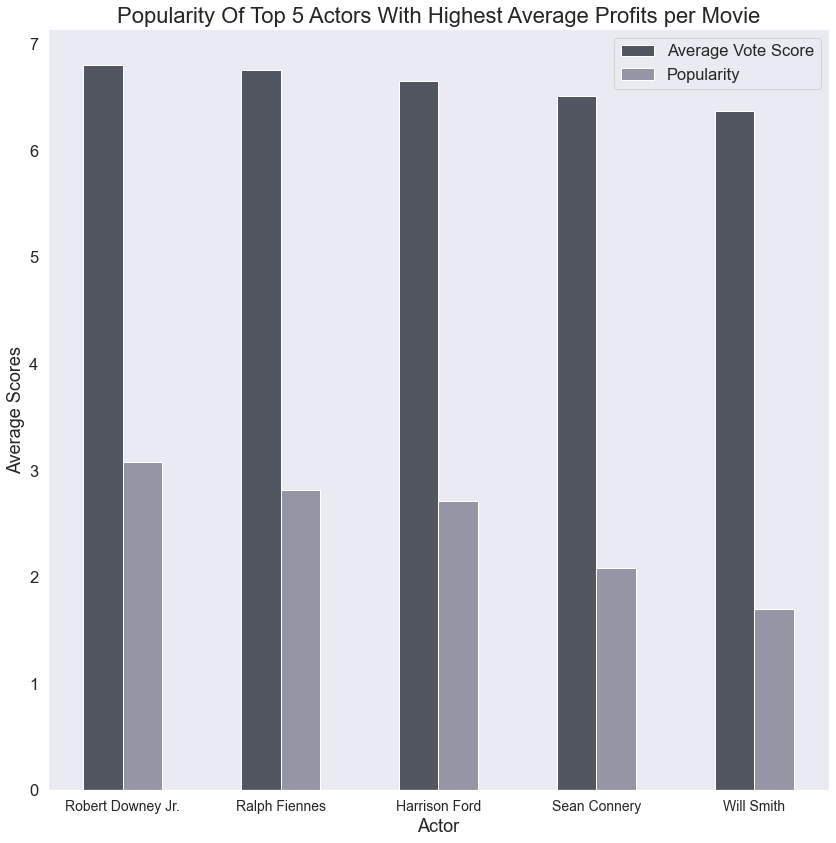

In [88]:
# indicis and width of the bar
ind = np.arange(len(big_actor_fav))
width=0.25

# Figure size
plt.subplots(figsize=(14,14))

# making the bar
plt.bar(ind , big_actor_fav, width, color='#525660', label='Average Vote Score')
plt.bar(ind+ width, big_actor_pop, width, color='#9495a5', label='Popularity')

# Labels
plt.title('Popularity Of Top 5 Actors With Highest Average Profits per Movie', fontsize=22)
plt.xlabel("Actor", fontsize=18)
plt.ylabel('Average Scores', fontsize=18)

# xticks labels and locations
labels = big_actor_fav.keys()
locations = ind + width / 2
plt.xticks(locations, labels, fontsize=14)


plt.legend()  # Getting legend
plt.show()

<a id='conclusions'></a>
## Conclusions

>- After going through a long way, the time came to summarize what we did. As we previously showed and mentioned that the number of movies produced have been highly increased over years, and this industry is getting bigger and bigger every day. In this work, we tried to shed some light on some interesting findings, but indeed, and like any other human work, our work has some defects that we have mentioned along the way like the popularity scores in the popularity column were not very clear, and for this we did not use it to guide our analysis, so we depend on the average popularity scores of movies as our operational definition of popularity. We tried as much as possible to reduce bias when dealing with the average rating scores by excluding all those with voting count less than 30, and in other cases we decided to be more firm and compare only those with voting count more than 100. It's also worth noting that when we deal with profits or popularity, average rating score as we defined it, those are for movies not for a particular actor or a specific company, and so on. For comparing directors and actors, we worked on reducing bias as much as possible, so we have only compared actors or directors that were of the most 100 that participated in different movies.

>- We tried to dig deeper in our dataset to come out with some useful insights. We worked on linking the popularity of movies and their profits with directors, actors, companies, and more which in turn enabled us to extract some very interesting findings. In addition to this we found some shocking results as The profits for The Shawshank Redemption movie, which is the most popular movie at all times, were extremely low which does not express the popularity of this movie at all. 

>- We also found that the top 5 movies that lost the biggest amount of money have popularity scores above the average which could make us consider saying that those movies for people were not too bad for people, and indeed they were terrible in the business world, and between what people like and the business needs there is another whole story.


>- But what about the limitations that we have faced along the way, and things that we could do to make this work even better. we could shed some light on some interesting findings if we have some data about the profits of each actor from movies that they were part of, in addition to that if we have such a data for the directors this would be a nice thing. We could as well look at companies and their net profits, but unfortunately our data were not very much helpful in that. With these information we have, we could dig deeper in the data to gain some insights like if there were some genres that were popular at some particular times, but not others. We may also take a look to see if some actors or directors were more successful at some genres than the others, and this will work well for production companies as well, as it would be very nice to know what different genres each companies focus on, and those they were good at. One other thing that would be great to know, but unfortunately we did not have enough information to get us to know it is the mother company for different companies we have, and compare those together. we could even look to see the golden years of some actors, directors, companies or even what were the popular genres over years and more and more to talk about, but for us today we will call it a day, and wait till another day.